In [ ]:
#importing dependencies
import pandas as pd
import numpy as np
import zipfile
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:

# # Replace 'your_file.zip' with the name of your zip file
# zip_file = '/content/drive/MyDrive/datasets/skin lesion/archive.zip'

# # Extract the contents
# with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/datasets/skin lesion/unzipped')


In [ ]:

# # Replace 'your_file.zip' with the name of your zip file
# zip_file = '/content/drive/MyDrive/datasets/skin lesion/archive2.zip'

# # Extract the contents
# with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/datasets/skin lesion/unzipped')


In [ ]:
import os

def list_directories(folder_path):
    directories = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]
    return directories

folder_path = "/content/drive/MyDrive/datasets/skin lesion/unzipped/"
directories = list_directories(folder_path)
print("Directories in", folder_path, "are:", directories)


Directories in /content/drive/MyDrive/datasets/skin lesion/unzipped/ are: ['test', 'train', 'skin']


In [ ]:
cat2=['Melanoma Skin Cancer Nevi and Moles']


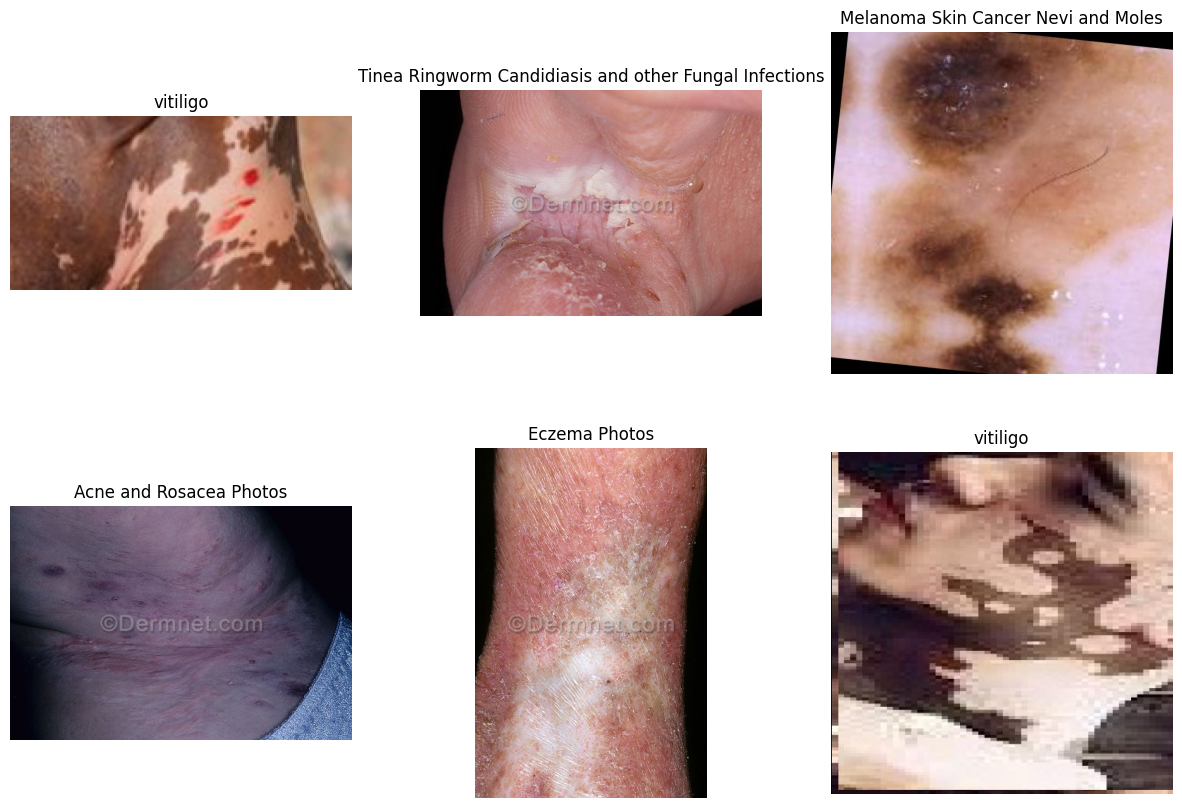

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import random

# Function to display sample images with labels
def display_sample_images(folder_path, categories):
    num_categories = len(categories)
    num_rows = 2
    num_cols = 3
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    # Randomly select 5 unique categories
    unique_categories = random.sample(categories, num_rows * num_cols - 1)
    # Duplicate one category
    categories_to_display = unique_categories + [random.choice(unique_categories)]

    for i in range(num_rows):
        for j in range(num_cols):
            category = categories_to_display[i * num_cols + j]

            # Get list of files in the category folder
            category_folder = os.path.join(folder_path, category)
            files = os.listdir(category_folder)
            # Select a random image file
            image_file = random.choice([f for f in files if f.endswith('.jpg') or f.endswith('.png')])

            # Read image
            image_path = os.path.join(category_folder, image_file)
            image = cv2.imread(image_path)
            # Convert image from BGR to RGB (Matplotlib expects RGB)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Display image with label
            axes[i, j].imshow(image)
            axes[i, j].set_title(category)
            axes[i, j].axis('off')

    plt.show()

# Define folder path containing images
folder_path = "/content/drive/MyDrive/datasets/skin lesion/unzipped/skin/train/"
# Define categories
categories = ['Acne and Rosacea Photos', 'vitiligo', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Melanoma Skin Cancer Nevi and Moles', 'Eczema Photos']

# Display 6 images with subplots
display_sample_images(folder_path, categories)


In [ ]:
cat=['Acne and Rosacea Photos',
 'Normal',
 'vitiligo',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
     'Melanoma Skin Cancer Nevi and Moles',
 'Eczema Photos']

In [ ]:
def data_dictionary():
    path_train="/content/drive/MyDrive/datasets/skin lesion/unzipped/skin/train/"
    path_test="/content/drive/MyDrive/datasets/skin lesion/unzipped/train/"
    list_train=cat#os.listdir(path_train)
    list_train1=cat2
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j
            if img_path_train!="/content/drive/MyDrive/datasets/skin lesion/unzipped/skin/train/Normal/34.avif":

                train_dictionary["image_path"].append(img_path_train)
                train_dictionary['target'].append(k)
        k+=1
    for i in list_train1:
        path_disease_test=path_test+i
        image_list_test=os.listdir(path_disease_test)
        for j in image_list_test:
            img_path_train=path_disease_test+"/"+j
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(4)
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [ ]:
def data_dictionary():
    import os
    import pandas as pd

    path_train="/content/drive/MyDrive/datasets/skin lesion/unzipped/skin/train/"
    path_test="/content/drive/MyDrive/datasets/skin lesion/unzipped/train/"
    list_train=cat#os.listdir(path_train)
    list_train1=cat2
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0

    # Encoding dictionary
    label_encoding = {i: k for k, i in enumerate(cat)}
    label_encoding['Normal'] = 4

    for i in list_train:
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j
            if img_path_train!="/content/drive/MyDrive/datasets/skin lesion/unzipped/skin/train/Normal/34.avif":
                train_dictionary["image_path"].append(img_path_train)
                train_dictionary['target'].append(label_encoding[i])
        k+=1
    for i in list_train1:
        path_disease_test=path_test+i
        image_list_test=os.listdir(path_disease_test)
        for j in image_list_test:
            img_path_train=path_disease_test+"/"+j
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(label_encoding['Normal'])
    train_df=pd.DataFrame(train_dictionary)

    # Inverse encoding dictionary
    inverse_label_encoding = {v: k for k, v in label_encoding.items()}

    return  train_df, inverse_label_encoding

# Example usage
train_df, inverse_label_encoding = data_dictionary()
print(train_df.head())
print(inverse_label_encoding)


                                          image_path  target
0  /content/drive/MyDrive/datasets/skin lesion/un...       0
1  /content/drive/MyDrive/datasets/skin lesion/un...       0
2  /content/drive/MyDrive/datasets/skin lesion/un...       0
3  /content/drive/MyDrive/datasets/skin lesion/un...       0
4  /content/drive/MyDrive/datasets/skin lesion/un...       0
{0: 'Acne and Rosacea Photos', 4: 'Melanoma Skin Cancer Nevi and Moles', 2: 'vitiligo', 3: 'Tinea Ringworm Candidiasis and other Fungal Infections', 5: 'Eczema Photos'}


In [ ]:
# Assuming train_df is your training DataFrame and inverse_label_encoding is the inverse encoding dictionary
# Assuming inverse_label_encoding is your inverse encoding dictionary

# Remove "Photos" from the category labels
for key, value in inverse_label_encoding.items():
    inverse_label_encoding[key] = value.replace(" Photos", "")

print(inverse_label_encoding)

train_df['target'] = train_df['target'].replace(inverse_label_encoding)

print(train_df.head())


{0: 'Acne and Rosacea', 4: 'Melanoma Skin Cancer Nevi and Moles', 2: 'vitiligo', 3: 'Tinea Ringworm Candidiasis and other Fungal Infections', 5: 'Eczema'}
                                          image_path            target
0  /content/drive/MyDrive/datasets/skin lesion/un...  Acne and Rosacea
1  /content/drive/MyDrive/datasets/skin lesion/un...  Acne and Rosacea
2  /content/drive/MyDrive/datasets/skin lesion/un...  Acne and Rosacea
3  /content/drive/MyDrive/datasets/skin lesion/un...  Acne and Rosacea
4  /content/drive/MyDrive/datasets/skin lesion/un...  Acne and Rosacea


In [ ]:
image_width = 224
image_height = 224
batch_size = 32

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Define image dimensions
image_width, image_height = 299, 299  # Adjust according to InceptionV3 input requirements

# Define batch size
batch_size = 32  # Adjust according to your requirements

# Assuming you have a DataFrame called train_df containing your data
# Columns may include 'image_path' and 'label'

# Split the data into train and test sets
train, test = train_test_split(train_df, test_size=0.3, random_state=42)

# Create train and test data generators
train_datagen = ImageDataGenerator(rescale=1./255)  # You can add more augmentation parameters here
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='image_path',
    y_col='target',
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='image_path',
    y_col='target',
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the number of classes based on your dataset
num_classes = 5

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create custom top layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')  # Adjust the number of units according to your number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,  # Adjust the number of epochs as needed
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


Found 5117 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 14 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


Found 2195 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 4 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/5
159/159 [==============================] - 1431s 9s/step - loss: 0.6620 - accuracy: 0.7477 - val_loss: 0.5247 - val_accuracy: 0.7996
Epoch 2/5
159/159 [==============================] - 446s 3s/step - loss: 0.4601 - accuracy: 0.8218 - val_loss: 0.4882 - val_accuracy: 0.8125
Epoch 3/5
159/159 [==============================] - 446s 3s/step - loss: 0.3990 - accuracy: 0.8468 - val_loss: 0.4797 - val_accuracy: 0.8102
Epoch 4/5
159/159 [==============================] - 444s 3s/step - loss: 0.3467 - accuracy: 0.8639 - val_loss: 0.5405 - val_accuracy: 0.7964
Epoch 5/5
159/159 [==============================] - 431s 3s/step - loss: 0.3036 - accuracy: 0.8848 - val_loss: 0.4793 - val_accuracy: 0.8263


In [ ]:
model.save('/content/drive/MyDrive/saved_model/skin_inception2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 133s 2s/step


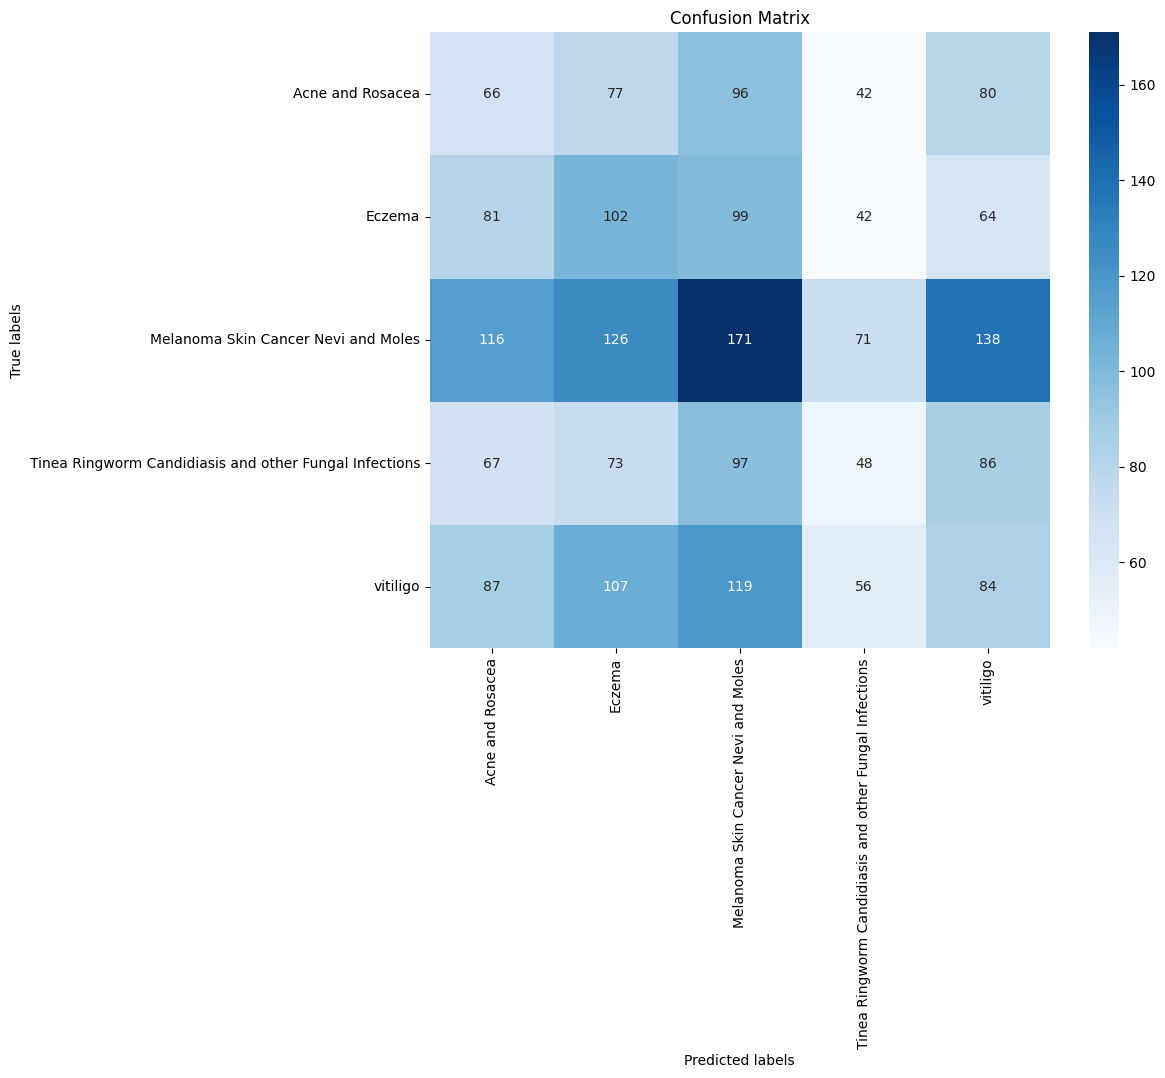

In [ ]:
# Get predictions
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Get the classification report
report = classification_report(y_true, y_pred_classes, target_names=class_labels)

# Print the classification report
print(report)


                                                        precision    recall  f1-score   support

                                      Acne and Rosacea       0.16      0.18      0.17       361
                                                Eczema       0.21      0.26      0.23       388
                   Melanoma Skin Cancer Nevi and Moles       0.29      0.27      0.28       622
Tinea Ringworm Candidiasis and other Fungal Infections       0.19      0.13      0.15       371
                                              vitiligo       0.19      0.19      0.19       453

                                              accuracy                           0.21      2195
                                             macro avg       0.21      0.21      0.21      2195
                                          weighted avg       0.22      0.21      0.21      2195



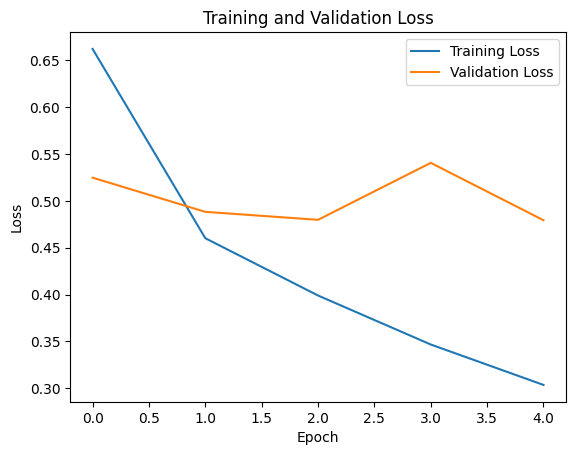

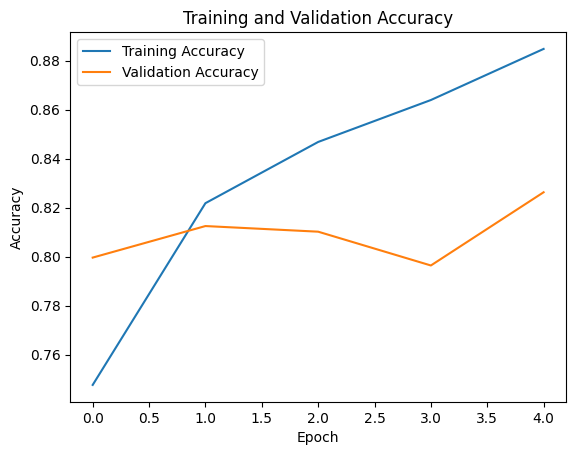

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Define image dimensions
image_width, image_height = 224, 224  # EfficientNetB0 input shape

# Define batch size
batch_size = 32  # Adjust according to your requirements

# Assuming you have a DataFrame called train_df containing your data
# Columns may include 'image_path' and 'label'

# Split the data into train and test sets
train, test = train_test_split(train_df, test_size=0.3, random_state=42)

# Create train and test data generators
train_datagen = ImageDataGenerator(rescale=1./255)  # You can add more augmentation parameters here
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='image_path',
    y_col='target',
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='image_path',
    y_col='target',
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the number of classes based on your dataset
num_classes = 5

# Load pre-trained EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create custom top layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')  # Adjust the number of units according to your number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,  # Adjust the number of epochs as needed
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)
model.save('/content/drive/MyDrive/saved_model/efficient.h5')

# Print accuracy and loss
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']


Found 5117 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 14 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


Found 2195 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 4 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/5
159/159 [==============================] - 185s 1s/step - loss: 1.6063 - accuracy: 0.2549 - val_loss: 1.5885 - val_accuracy: 0.2845
Epoch 2/5
159/159 [==============================] - 178s 1s/step - loss: 1.5887 - accuracy: 0.2806 - val_loss: 1.5975 - val_accuracy: 0.2831
Epoch 3/5
159/159 [==============================] - 180s 1s/step - loss: 1.5891 - accuracy: 0.2794 - val_loss: 1.5878 - val_accuracy: 0.2835
Epoch 4/5
159/159 [==============================] - 180s 1s/step - loss: 1.5877 - accuracy: 0.2793 - val_loss: 1.5882 - val_accuracy: 0.2835
Epoch 5/5
159/159 [==============================] - 179s 1s/step - loss: 1.5863 - accuracy: 0.2804 - val_loss: 1.5887 - val_accuracy: 0.2826


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


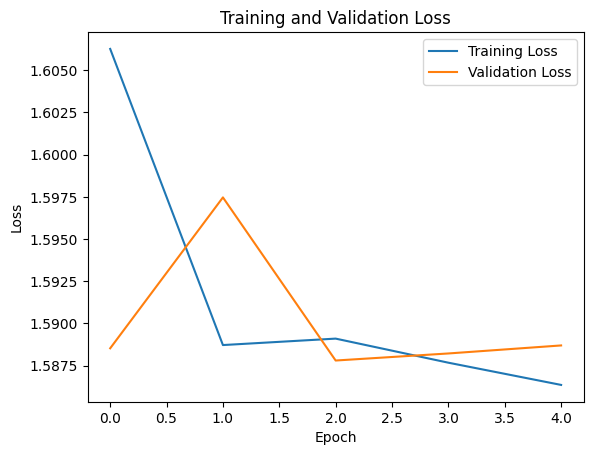

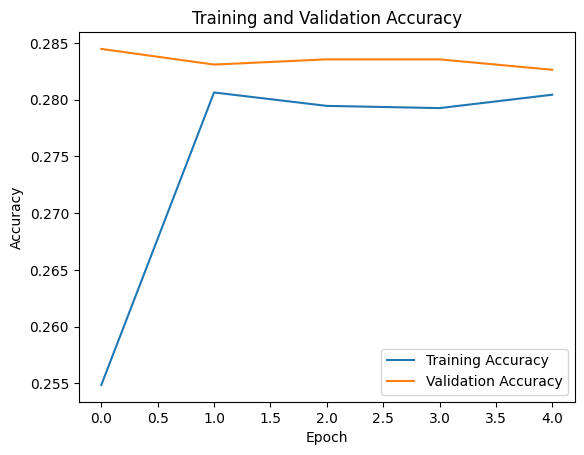

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Get predictions
from sklearn.metrics import confusion_matrix

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Get class labels
class_labels = list(test_generator.class_indices.keys())


69/69 [==============================] - 55s 771ms/step


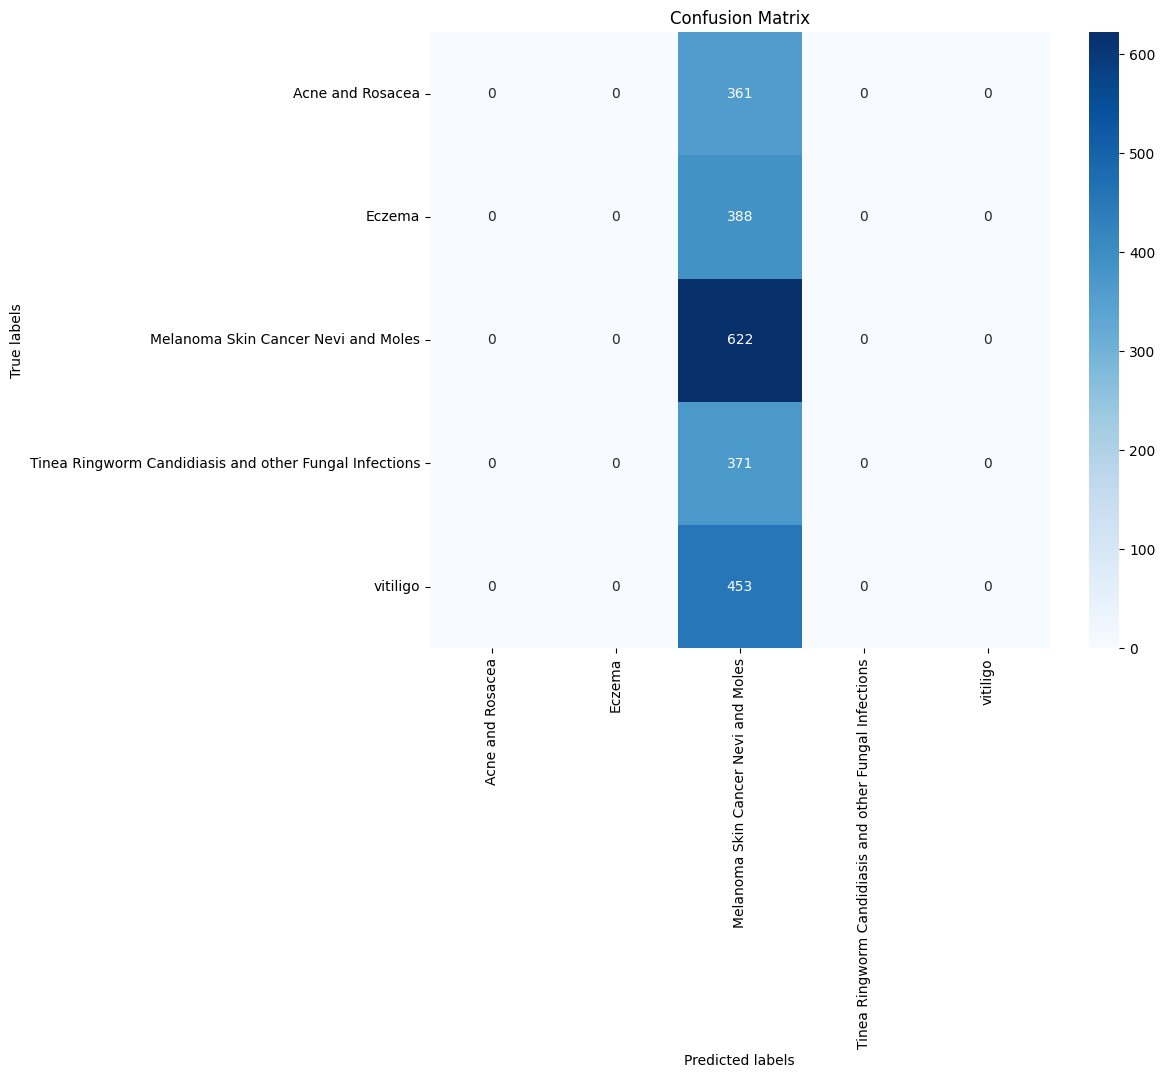

In [ ]:

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Get the classification report
report = classification_report(y_true, y_pred_classes, target_names=class_labels)

# Print the classification report
print(report)


                                                        precision    recall  f1-score   support

                                      Acne and Rosacea       0.00      0.00      0.00       361
                                                Eczema       0.00      0.00      0.00       388
                   Melanoma Skin Cancer Nevi and Moles       0.28      1.00      0.44       622
Tinea Ringworm Candidiasis and other Fungal Infections       0.00      0.00      0.00       371
                                              vitiligo       0.00      0.00      0.00       453

                                              accuracy                           0.28      2195
                                             macro avg       0.06      0.20      0.09      2195
                                          weighted avg       0.08      0.28      0.13      2195



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
class_labels = train_generator.class_indices
decoded_predictions = np.argmax(predictions, axis=1)
predicted_labels = [list(class_labels.keys())[i] for i in decoded_predictions]


2195/2195 [==============================] - 175s 80ms/step


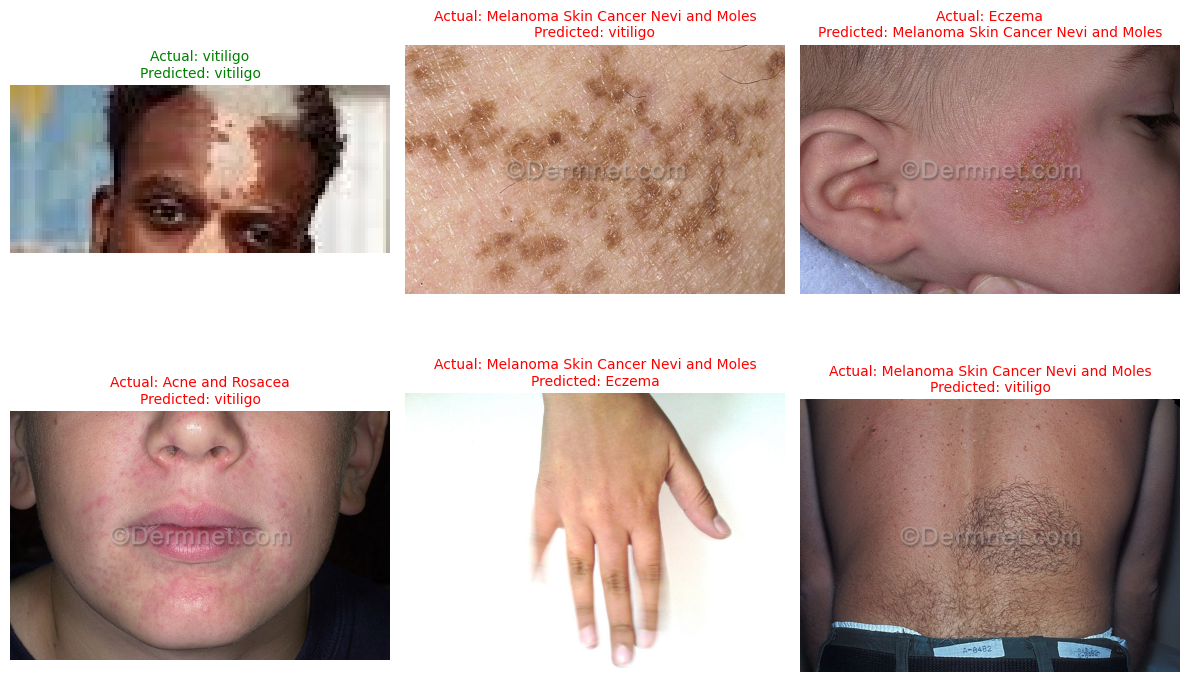

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Assuming you have a DataFrame called test containing image paths and actual labels
# Make predictions using your model and store the predicted labels in a list called predicted_labels

# Sample a few test samples randomly
num_samples_to_display = 6

# Sample a few test samples randomly
sample_indices = random.sample(range(len(test)), num_samples_to_display)

# Plot the sampled test images with actual and predicted labels
plt.figure(figsize=(12, 8))
for i, idx in enumerate(sample_indices, 1):
    image_path = test.iloc[idx]['image_path']
    actual_label = test.iloc[idx]['target']
    predicted_label = predicted_labels[idx]  # Assuming predicted_labels is a list containing predicted labels

    # Load the image
    img = mpimg.imread(image_path)

    plt.subplot(2, 3, i)
    plt.imshow(img)

    # Determine the color of the title based on correct or incorrect prediction
    title_color = 'green' if actual_label == predicted_label else 'red'
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}", fontsize=10, color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()
